Langkah 1 Selesai: Library Imported

--- Info Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error            

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


/tmp/ipython-input-4120476434.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='viridis')


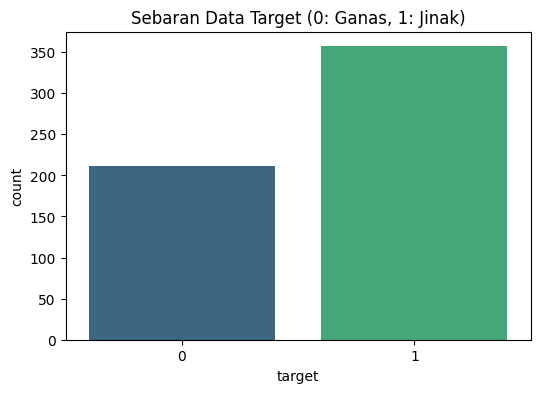


Dimensi Fitur (X): (569, 30)
Dimensi Target (y): (569,)

Data Training: (455, 30)
Data Testing: (114, 30)

Sedang melatih model...
Model selesai dilatih!

=== HASIL EVALUASI ===
Akurasi Model: 96.49%

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



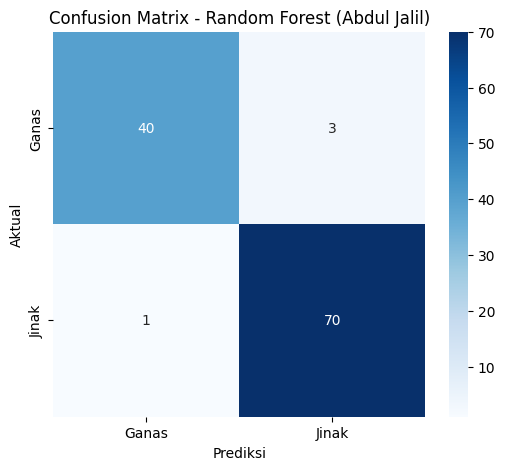


BERHASIL: File 'model_breast_cancer.pkl' telah disimpan.
Silakan download file tersebut dari menu Files di sebelah kiri Colab untuk diupload ke GitHub.


In [1]:
# ==========================================
# 1. IMPORT LIBRARY
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib  # Untuk menyimpan model buat Streamlit

# Library Machine Learning (Scikit-learn)
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # Kita pakai Classifier untuk tugas Klasifikasi
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Langkah 1 Selesai: Library Imported")

# ==========================================
# 2. EDA (Exploratory Data Analysis)
# ==========================================
# Kita pakai dataset Breast Cancer (Dataset kecil, bagus, dan bersih)
data_cancer = load_breast_cancer()
df = pd.DataFrame(data_cancer.data, columns=data_cancer.feature_names)
df['target'] = data_cancer.target # 0 = Malignant (Ganas), 1 = Benign (Jinak)

print("\n--- Info Dataset ---")
print(df.info())

print("\n--- 5 Baris Pertama Data ---")
display(df.head())

# Cek sebaran data target (Penting untuk Classification)
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df, palette='viridis')
plt.title('Sebaran Data Target (0: Ganas, 1: Jinak)')
plt.show()

# ==========================================
# 3. DATA PREPARATION
# ==========================================
# Memisahkan Fitur (X) dan Target (y)
X = df.drop('target', axis=1)
y = df['target']

print("\nDimensi Fitur (X):", X.shape)
print("Dimensi Target (y):", y.shape)

# ==========================================
# 4. SPLITTING DATA
# ==========================================
# Membagi data menjadi 80% Training dan 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nData Training: {X_train.shape}")
print(f"Data Testing: {X_test.shape}")

# ==========================================
# 5. TRAINING & 6. MODELING
# ==========================================
# Menggunakan Random Forest Classifier
print("\nSedang melatih model...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
print("Model selesai dilatih!")

# ==========================================
# 7. TESTING
# ==========================================
# Melakukan prediksi terhadap data testing
y_pred = rf_model.predict(X_test)

# ==========================================
# 8. EVALUASI
# ==========================================
print("\n=== HASIL EVALUASI ===")
print(f"Akurasi Model: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

# Visualisasi Confusion Matrix (Bagus untuk Screenshot Laporan)
plt.figure(figsize=(6,5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ganas', 'Jinak'], yticklabels=['Ganas', 'Jinak'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - Random Forest (Abdul Jalil)')
plt.show()

# ==========================================
# PERSIAPAN STREAMLIT (SIMPAN MODEL)
# ==========================================
# Kita simpan Model dan Nama Fitur agar nanti di Streamlit tidak error
model_data = {
    'model': rf_model,
    'feature_names': data_cancer.feature_names
}

joblib.dump(model_data, 'model_breast_cancer.pkl')
print("\nBERHASIL: File 'model_breast_cancer.pkl' telah disimpan.")
print("Silakan download file tersebut dari menu Files di sebelah kiri Colab untuk diupload ke GitHub.")

--- Data Regresi (Diabetes) ---


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0



Melatih Model Regresi...

=== HASIL REGRESI ===
Mean Squared Error: 2952.01
R2 Score: 0.44


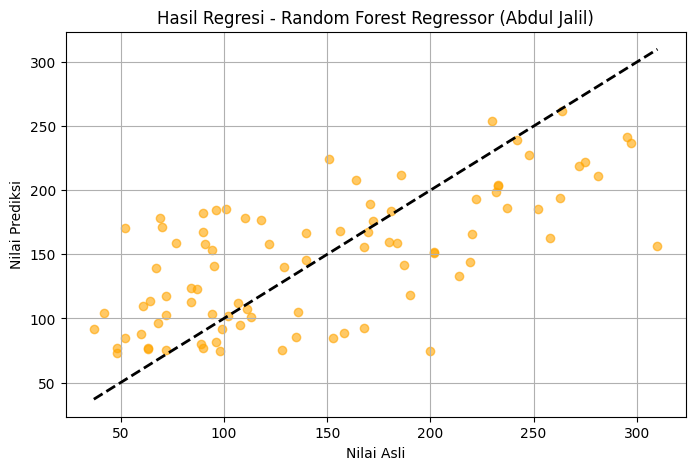

Model regresi tersimpan sebagai 'model_diabetes_regresi.pkl'


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['sex'].plot(kind='hist', bins=20, title='sex')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['bmi'].plot(kind='hist', bins=20, title='bmi')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='age', y='sex', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='sex', y='bmi', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='bmi', y='bp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['sex']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('sex')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['bmi']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('bmi')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['bp']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('bp')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['sex'].plot(kind='line', figsize=(8, 4), title='sex')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['bmi'].plot(kind='line', figsize=(8, 4), title='bmi')
plt.gca().spines[['top', 'right']].set_visible(False)

In [2]:
# ==========================================
# PART 2: REGRESSION (Untuk Screenshot Bukti Regresi)
# ==========================================

# 1. IMPORT LIBRARY (Khusus Regresi)
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor # Pakai Regressor
from sklearn.metrics import mean_squared_error, r2_score

# 2. EDA & DATA PREPARATION
# Kita pakai dataset Diabetes (Prediksi perkembangan penyakit - Angka)
data_reg = load_diabetes()
df_reg = pd.DataFrame(data_reg.data, columns=data_reg.feature_names)
df_reg['target'] = data_reg.target

print("--- Data Regresi (Diabetes) ---")
display(df_reg.head())

# 3. SPLITTING DATA
X_reg = df_reg.drop('target', axis=1)
y_reg = df_reg['target']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# 4. MODELING (Random Forest Regressor)
print("\nMelatih Model Regresi...")
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_reg, y_train_reg)

# 5. TESTING
y_pred_reg = rf_regressor.predict(X_test_reg)

# 6. EVALUASI
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"\n=== HASIL REGRESI ===")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

# 7. VISUALISASI (Screenshot ini untuk form 'Bukti Regresi')
plt.figure(figsize=(8, 5))
plt.scatter(y_test_reg, y_pred_reg, color='orange', alpha=0.6)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'k--', lw=2)
plt.xlabel('Nilai Asli')
plt.ylabel('Nilai Prediksi')
plt.title('Hasil Regresi - Random Forest Regressor (Abdul Jalil)')
plt.grid(True)
plt.show()

# Simpan Model Regresi juga (siapa tau mau dipajang di Streamlit)
joblib.dump(rf_regressor, 'model_diabetes_regresi.pkl')
print("Model regresi tersimpan sebagai 'model_diabetes_regresi.pkl'")